<a href="https://colab.research.google.com/github/AaliyahLusianti074/TugasPraktikumML_066-074/blob/main/Modul_5_Pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive._mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from os import mkdir

mkdir('/content/asl_alphabet')
mkdir('/content/asl_alphabet/train')
mkdir('/content/asl_alphabet/train/A')
mkdir('/content/asl_alphabet/train/B')
mkdir('/content/asl_alphabet/validation')
mkdir('/content/asl_alphabet/validation/A')
mkdir('/content/asl_alphabet/validation/B')

In [3]:
import os
import shutil

a_original = "/content/drive/MyDrive/ML/Kaggle/asl_alphabet_train/asl_alphabet_train/A"
a_train = "/content/asl_alphabet/train/A"
a_validation = "/content/asl_alphabet/validation/A"

files = os.listdir(a_original)

# Pindah 70% file
for file in files[0:int(len(files) * .7)]:
  new_path = shutil.move(f"{a_original}/{file}", a_train)

In [4]:
files2 = os.listdir(a_original)

# Pindah sisa file
for file in files2:
    new_path = shutil.move(f"{a_original}/{file}", a_validation)

In [5]:
import os
import shutil

b_original = "/content/drive/MyDrive/ML/Kaggle/asl_alphabet_train/asl_alphabet_train/B"
b_train = "/content/asl_alphabet/train/B"
b_validation = "/content/asl_alphabet/validation/B"

files = os.listdir(b_original)

# Pindah 70% file
for file in files[0:int(len(files) * .7)]:
  new_path = shutil.move(f"{b_original}/{file}", b_train)

In [12]:
files2 = os.listdir(b_original)

# Pindah sisa file
for file in files2:
    new_path = shutil.move(f"{b_original}/{file}", b_validation)

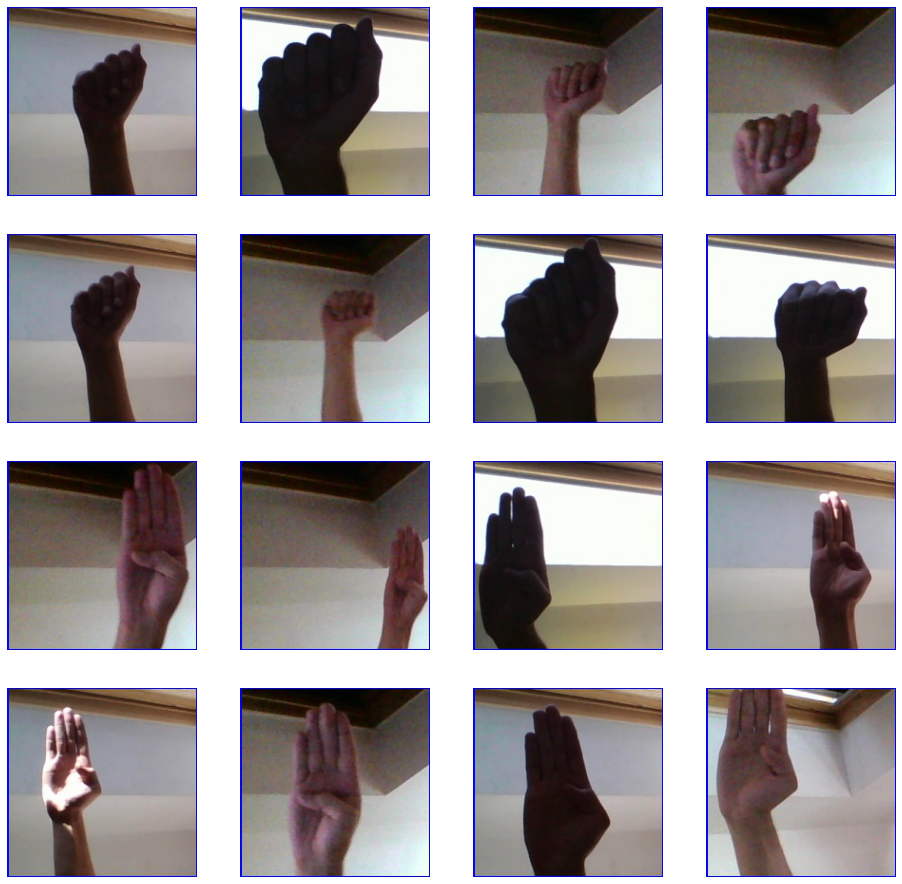

In [80]:
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.preprocessing import image
from tensorflow.keras.layers import Input, Lambda ,Dense ,Flatten ,Dropout
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2

train_dir = "/content/asl_alphabet/train"
eval_dir = "/content/asl_alphabet/validation"

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_a_pix = [os.path.join(train_a_dir, fname) 
                for fname in os.listdir(train_a_dir)[pic_index-8:pic_index]]
next_b_pix = [os.path.join(train_b_dir, fname) 
                for fname in os.listdir(train_b_dir)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_a_pix+next_b_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [11]:
def load_images(directory):
    images = []
    labels = []
    for idx, label in enumerate(uniq_labels):
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath), (64, 64))
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

In [12]:
import keras

uniq_labels = sorted(os.listdir(train_dir))
images, labels = load_images(directory = train_dir)

In [14]:
uniq_labels == sorted(os.listdir(eval_dir))
X_eval, y_eval = load_images(directory = eval_dir)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, stratify = labels)

n = len(uniq_labels)
train_n = len(X_train)
test_n = len(X_test)

print("Total number of symbols: ", n)
print("Number of training images: " , train_n)
print("Number of testing images: ", test_n)

eval_n = len(X_eval)
print("Number of evaluation images: ", eval_n)

Total number of symbols:  2
Number of training images:  3360
Number of testing images:  840
Number of evaluation images:  1800


In [17]:
uniq_labels

['A', 'B']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


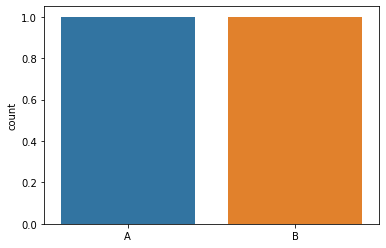

In [79]:
sns.countplot(uniq_labels)
plt.show()

In [18]:
import keras
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_eval = to_categorical(y_eval)

In [19]:
print(y_train[0])
print(len(y_train[0]))

[1. 0.]
2


In [20]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_eval = X_eval.astype('float32')/255.0

In [21]:
classifier_vgg16 = VGG16(input_shape= (64,64,3),include_top=False,weights='imagenet')

58900480/58889256 [==============================] - 1s 0us/step


In [22]:
classifier_resnet = ResNet50(input_shape= (64,64,3),include_top=False,weights='imagenet')

94781440/94765736 [==============================] - 1s 0us/step


In [23]:
for layer in classifier_vgg16.layers:
    layer.trainable = False

#don't train existing weights for resnet50
for layer in classifier_resnet.layers:
    layer.trainable = False

In [29]:
classifier1 = classifier_vgg16.output#head mode
classifier1 = Flatten()(classifier1)#adding layer of flatten
classifier1 = Dense(units=256, activation='relu')(classifier1)
classifier1 = Dropout(0.6)(classifier1)
classifier1 = Dense(units=2, activation='softmax')(classifier1)

model = Model(inputs = classifier_vgg16.input , outputs = classifier1)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
classifier2 = classifier_resnet.output#head mode
classifier2 = Flatten()(classifier2)#adding layer of flatten
classifier2 = Dropout(0.6)(classifier2)
classifier2 = Dense(units=2, activation='softmax')(classifier2)

model2 = Model(inputs = classifier_resnet.input , outputs = classifier2)
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [27]:
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                            

In [30]:
history = model.fit(X_train, y_train, epochs =20, batch_size = 64,validation_data=(X_test,y_test))

Epoch 1/20
53/53 [==============================] - 16s 101ms/step - loss: 0.2500 - accuracy: 0.8932 - val_loss: 0.0631 - val_accuracy: 0.9786
Epoch 2/20
53/53 [==============================] - 3s 65ms/step - loss: 0.0550 - accuracy: 0.9827 - val_loss: 0.0198 - val_accuracy: 0.9976
Epoch 3/20
53/53 [==============================] - 3s 65ms/step - loss: 0.0264 - accuracy: 0.9935 - val_loss: 0.0103 - val_accuracy: 0.9988
Epoch 4/20
53/53 [==============================] - 3s 65ms/step - loss: 0.0141 - accuracy: 0.9979 - val_loss: 0.0070 - val_accuracy: 0.9988
Epoch 5/20
53/53 [==============================] - 3s 65ms/step - loss: 0.0118 - accuracy: 0.9973 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 6/20
53/53 [==============================] - 3s 65ms/step - loss: 0.0088 - accuracy: 0.9982 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 7/20
53/53 [==============================] - 3s 66ms/step - loss: 0.0064 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 8/20


In [34]:
model.evaluate(X_test , y_test)

27/27 [==============================] - 1s 39ms/step - loss: 2.5903e-04 - accuracy: 1.0000


[0.0002590322110336274, 1.0]

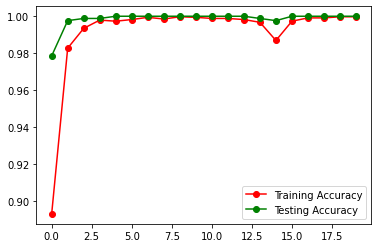

In [36]:
plt.plot(history.history["accuracy"] , 'ro-' , label = "Training Accuracy")
plt.plot(history.history["val_accuracy"] , 'go-' , label = "Testing Accuracy")
plt.legend()
plt.show()

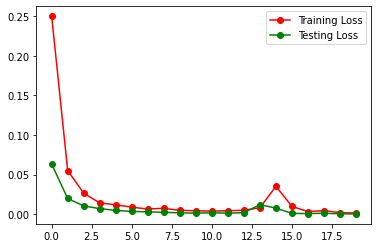

In [37]:
plt.plot(history.history["loss"] , 'ro-' , label = "Training Loss")
plt.plot(history.history["val_loss"] , 'go-' , label = "Testing Loss")
plt.legend()
plt.show()

In [39]:
y_pred  = model.predict(X_test).round()

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

target_names = [f"{uniq_labels[i]}" for i in range(2)]
print(classification_report(y_test , y_pred , target_names =target_names ))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       420
           B       1.00      1.00      1.00       420

   micro avg       1.00      1.00      1.00       840
   macro avg       1.00      1.00      1.00       840
weighted avg       1.00      1.00      1.00       840
 samples avg       1.00      1.00      1.00       840



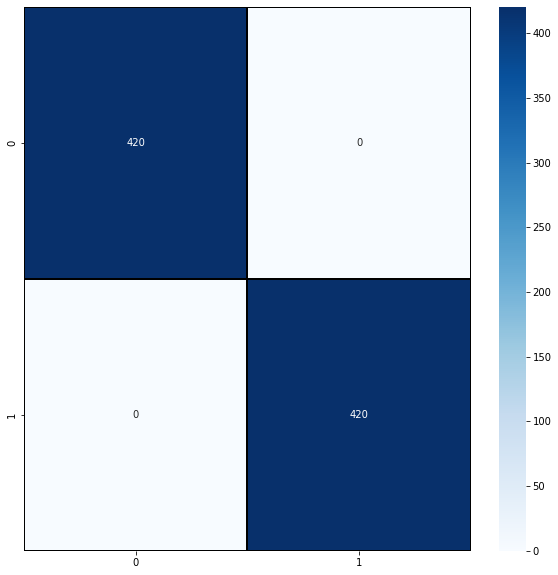

In [49]:
import pandas as pd
import seaborn as sns

cm = confusion_matrix(y_test.argmax(axis = 1) , y_pred.argmax(axis = 1))
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

**Membuat kode untuk melakukkan prediksi pada 10 gambar acak**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


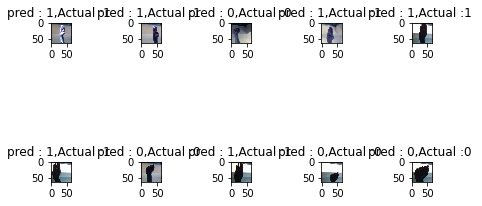

In [52]:
correct = np.nonzero(y_pred == y_test)[0]

k = 0 
for c in correct[:10]:
            plt.subplot(2,5,k+1)
            plt.imshow(X_test[k].reshape(64,64,3) , interpolation='none')
            plt.title(f"pred : {y_pred[k].argmax(axis = 0)},Actual :{y_test[k].argmax(axis = 0)} ")
            plt.tight_layout()
            k += 1

In [55]:
converter_model = tf.lite.TFLiteConverter.from_keras_model(model) 
tflite_model = converter_model.convert()

with open('model.tflite', 'wb') as f: 
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpz1mqrn54/assets


INFO:tensorflow:Assets written to: /tmp/tmpz1mqrn54/assets


In [58]:
history2 = model2.fit(X_train, y_train, epochs =20, batch_size = 64,validation_data=(X_test,y_test))

Epoch 1/20
53/53 [==============================] - 11s 112ms/step - loss: 0.7066 - accuracy: 0.5833 - val_loss: 0.5616 - val_accuracy: 0.6631
Epoch 2/20
53/53 [==============================] - 4s 72ms/step - loss: 0.5541 - accuracy: 0.7060 - val_loss: 0.4829 - val_accuracy: 0.8012
Epoch 3/20
53/53 [==============================] - 4s 84ms/step - loss: 0.5120 - accuracy: 0.7417 - val_loss: 0.4442 - val_accuracy: 0.8429
Epoch 4/20
53/53 [==============================] - 4s 72ms/step - loss: 0.4862 - accuracy: 0.7545 - val_loss: 0.4175 - val_accuracy: 0.8619
Epoch 5/20
53/53 [==============================] - 4s 84ms/step - loss: 0.4770 - accuracy: 0.7565 - val_loss: 0.4048 - val_accuracy: 0.8333
Epoch 6/20
53/53 [==============================] - 4s 83ms/step - loss: 0.4606 - accuracy: 0.7619 - val_loss: 0.3851 - val_accuracy: 0.8726
Epoch 7/20
53/53 [==============================] - 4s 72ms/step - loss: 0.4440 - accuracy: 0.7792 - val_loss: 0.3706 - val_accuracy: 0.8810
Epoch 8/20


In [59]:
model2.evaluate(X_test , y_test)

27/27 [==============================] - 1s 47ms/step - loss: 0.2974 - accuracy: 0.8964


[0.2973848879337311, 0.8964285850524902]

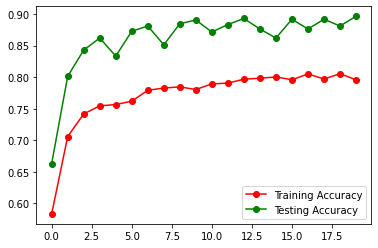

In [60]:
plt.plot(history2.history["accuracy"] , 'ro-' , label = "Training Accuracy")
plt.plot(history2.history["val_accuracy"] , 'go-' , label = "Testing Accuracy")
plt.legend()
plt.show()

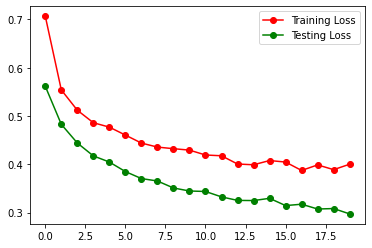

In [61]:
plt.plot(history2.history["loss"] , 'ro-' , label = "Training Loss")
plt.plot(history2.history["val_loss"] , 'go-' , label = "Testing Loss")
plt.legend()
plt.show()

In [62]:
y_pred  = model2.predict(X_test).round()

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

target_names = [f"{uniq_labels[i]}" for i in range(2)]
print(classification_report(y_test , y_pred , target_names =target_names ))

              precision    recall  f1-score   support

           A       0.94      0.85      0.89       420
           B       0.86      0.95      0.90       420

   micro avg       0.90      0.90      0.90       840
   macro avg       0.90      0.90      0.90       840
weighted avg       0.90      0.90      0.90       840
 samples avg       0.90      0.90      0.90       840



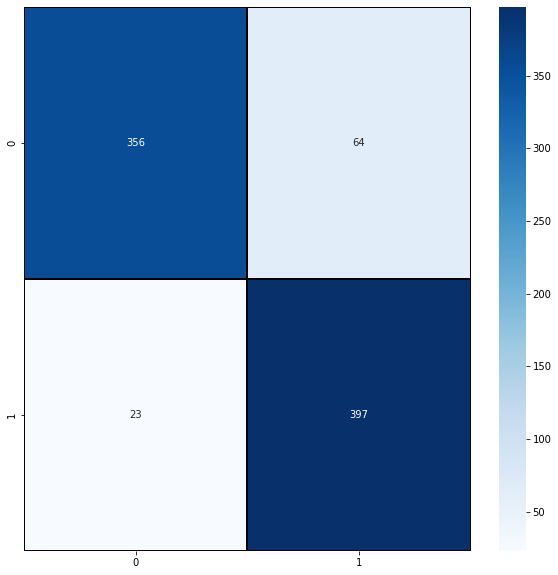

In [64]:
import pandas as pd
import seaborn as sns

cm = confusion_matrix(y_test.argmax(axis = 1) , y_pred.argmax(axis = 1))
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


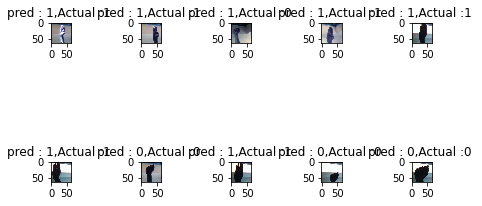

In [65]:
correct = np.nonzero(y_pred == y_test)[0]

k = 0 
for c in correct[:10]:
            plt.subplot(2,5,k+1)
            plt.imshow(X_test[k].reshape(64,64,3) , interpolation='none')
            plt.title(f"pred : {y_pred[k].argmax(axis = 0)},Actual :{y_test[k].argmax(axis = 0)} ")
            plt.tight_layout()
            k += 1

In [66]:
converter_model = tf.lite.TFLiteConverter.from_keras_model(model2) 
tflite_model = converter_model.convert()

with open('model2.tflite', 'wb') as f: 
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpcjg2ir74/assets


INFO:tensorflow:Assets written to: /tmp/tmpcjg2ir74/assets
